In [2]:
!pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 24.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tag_list = open(r'data/dictionaries/tag_list.txt').read().splitlines()

In [4]:
df = pd.read_json('data/datasets/full_dataset.json', lines=True)
df

,tag_string_general,has_visible_children,has_large,tag_count_meta,bit_flags,has_active_children,preview_file_url,image_width,updated_at,tag_string_artist,...,last_commented_at,last_comment_bumped_at,parent_id,approver_id,pixiv_id,last_noted_at,filtered_tag_string,prompt_format_id,prompt_string,caption_string
0,1girl ;p ahoge bed_sheet blurry blurry_backgro...,False,1.0,1,2,False,https://cdn.donmai.us/preview/a4/77/a4773ba245...,1100,2021-09-29 10:33:58.201,tagame_(tagamecat),...,NaT,NaT,NaN,NaN,66118571.0,NaT,1girl ;p ahoge bed_sheet blurry blurry_backgro...,0,Reply with an eloquent caption based on all th...,"""Tagame's masterful artistry captures Kanbe Ko..."
1,1girl apron barefoot blonde_hair blush breasts...,False,0.0,4,0,False,https://cdn.donmai.us/preview/e0/85/e085faf380...,800,2021-11-07 13:44:46.477,yukataro,...,2013-06-06 00:46:40.388,2013-06-06 00:46:40.388,NaN,NaN,NaN,2013-06-03 18:45:36.358000128,1girl apron barefoot blonde_hair blush breasts...,1,Reply with a concise description of an artwork...,"The artwork is a sketch of Yakumo Ran, a chara..."
2,1girl animal_ears bandaid bandaid_on_head biki...,False,1.0,2,2,False,https://cdn.donmai.us/preview/54/82/5482e866cc...,3314,2021-11-08 13:31:08.499,elsynien,...,NaT,NaT,4899853.0,131474.0,NaN,NaT,1girl animal_ears bandaid bikini breasts brown...,0,Reply with an eloquent caption based on all th...,Elsynien's exquisite artistry brings to life t...
3,1girl :o arms_up bangs blue_dress blue_eyes bl...,False,1.0,2,2,False,https://cdn.donmai.us/preview/30/30/3030cc900d...,1200,2019-09-12 23:46:27.779,antidote,...,NaT,NaT,NaN,NaN,74210225.0,NaT,1girl :o arms_up bangs blue_dress blue_eyes bl...,3,A chat between a user and an assistant. The as...,"A young woman with blue eyes and hair, dressed..."
4,1girl black_gloves black_gothic_dress_(idolmas...,False,0.0,1,0,False,https://cdn.donmai.us/preview/27/ba/27baeb14fb...,586,2021-09-20 08:47:58.364,hiiragi_hazime,...,NaT,NaT,NaN,NaN,56566472.0,NaT,1girl black_gloves breasts brown_hair dress gl...,3,A chat between a user and an assistant. The as...,A female singer wearing black gloves and a dre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1girl animal_ears furry furry_female green_eye...,False,0.0,3,0,False,https://cdn.donmai.us/preview/a4/d8/a4d84e30af...,800,2021-08-28 18:02:24.851,koishi_chikasa,...,NaT,NaT,NaN,NaN,15198167.0,NaT,1girl animal_ears furry furry_female green_eye...,3,A chat between a user and an assistant. The as...,An anthropomorphic female character with green...
29996,1girl arm_up armpits bow breasts brown_hair ha...,False,0.0,1,0,False,https://cdn.donmai.us/preview/e8/35/e8355965a2...,703,2021-08-23 05:17:10.332,nannacy7,...,NaT,NaT,NaN,NaN,47359125.0,NaT,1girl arm_up armpits bow breasts brown_hair ha...,0,Reply with an eloquent caption based on all th...,"In the simplicity of the background, nannacy7 ..."
29997,1girl :< alternate_eye_color arm_up armpits ba...,False,1.0,2,0,False,https://cdn.donmai.us/preview/21/d0/21d0b9d805...,1000,2021-09-06 08:09:00.197,anmi,...,NaT,NaT,NaN,NaN,NaN,NaT,1girl :< alternate_eye_color arm_up armpits ba...,0,Reply with an eloquent caption based on all th...,With her sturgeon face and crescent hair ornam...
29998,1boy 2girls 4koma :d ahoge blonde_hair blue_ey...,False,1.0,4,0,False,https://cdn.donmai.us/preview/a2/7c/a27c781946...,1075,2021-07-26 20:50:42.519,otsu_kinoto,...,2017-02-27 14:05:14.208,2017-02-27 14:05:14.208,NaN,13793.0,43242731.0,NaT,1boy 2girls 4koma :d ahoge blonde_hair blue_ey...,0,Reply with an eloquent caption based on all th...,"""An enchanting 4koma featuring Kawashiro Nitor..."


In [5]:
sns.set_theme(style='darkgrid')

<AxesSubplot: xlabel='filtered_tag_string', ylabel='Count'>

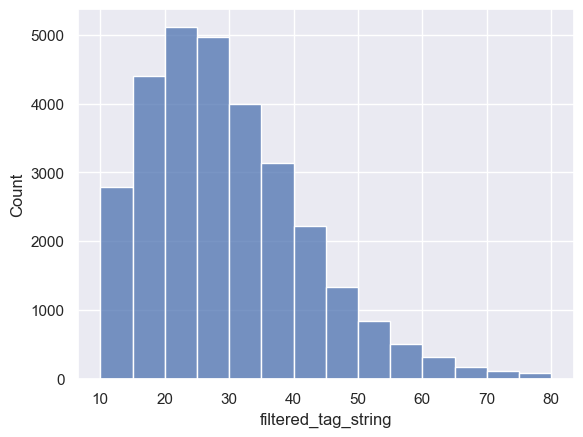

In [6]:
sns.histplot(df.filtered_tag_string.str.split().apply(len), binwidth=5)

<AxesSubplot: xlabel='caption_string', ylabel='Count'>

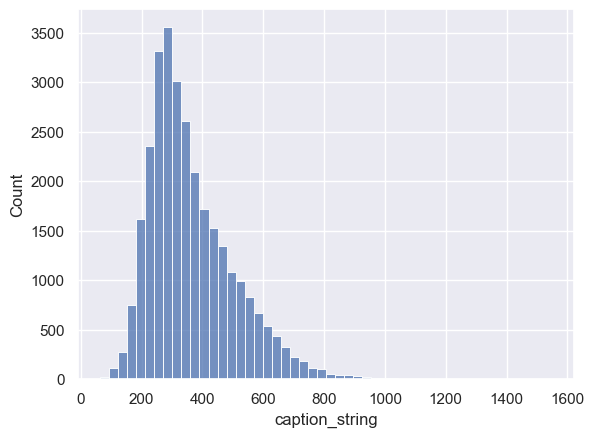

In [7]:
sns.histplot(df.caption_string.apply(len), bins=50)

In [8]:
from collections import defaultdict

def count_tags(df):
    tag_counts = defaultdict(lambda: {'post_count': 0})
    for _, row in df.iterrows():
        tags = row['filtered_tag_string'].split()
        for tag in tags:
            tag_counts[tag]['post_count'] += 1
    return tag_counts


def create_df(tag_counts):
    tag_df = pd.DataFrame.from_dict(tag_counts, orient='index')
    tag_df.index.name = 'name'
    tag_df = tag_df.sort_values('post_count', ascending=False)
    tag_df = tag_df.reset_index()
    return tag_df

In [9]:
tag_counts = count_tags(df)
tag_df = create_df(tag_counts)
tag_df

,name,post_count
0,1girl,20971
1,solo,18612
2,long_hair,16075
3,looking_at_viewer,12860
4,smile,11850
...,...,...
6050,thigh_grab,1
6051,cursor,1
6052,knight_(chess),1
6053,backboob,1


In [10]:
yeet = pd.Series(tag_list)
yeet[~yeet.isin(tag_df.name)]

115                       penis
120                       pussy
146                         cum
158                         sex
212                     vaginal
                 ...           
6417                condom_belt
6435           black_pubic_hair
6451    kaname_madoka_(cosplay)
6462            flat_chest_grab
6463        covering_one_breast
Length: 419, dtype: object

<AxesSubplot: xlabel='post_count', ylabel='Count'>

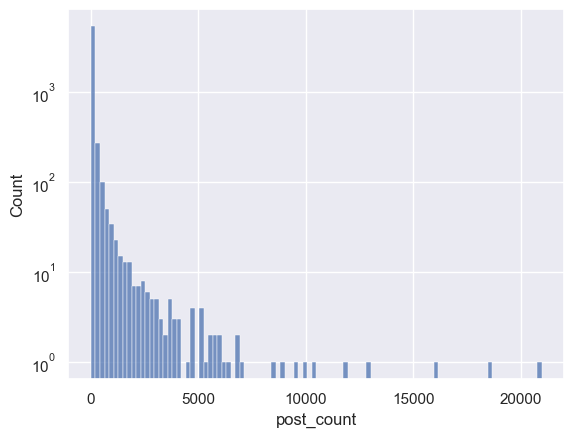

In [11]:
sns.histplot(data=tag_df.post_count, log_scale=(False, True), bins=100)

In [13]:
tag_df.to_json(r'data/dictionaries/tag_counts.json', orient='records',lines=True)